In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [ ]:
# set de datos
N = 1200

gaussian_quantiles = make_gaussian_quantiles( mean=None,
                        cov=.1,
                        n_samples=N,
                        n_features=2, # dimensiones del set de datos
                        n_classes=2, #n clases para resolver el problema de clasificacion
                        shuffle=True,
                        random_state=None
                        )
# asignar la data a unas variables 
x,y=gaussian_quantiles

In [ ]:
print(x.shape)

print(y.shape)
# redim el vector y para poder procesarolo
y= y[:,np.newaxis]
print(y.shape)

(1200, 2)
(1200,)
(1200, 1)


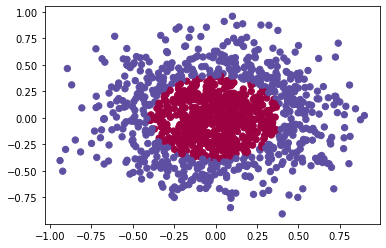

In [ ]:
# imprimir grafica
plt.scatter(x[:,0], x[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral);

Funciones de activacion

In [ ]:
def sigmoid(x,derivate=False):
  if derivate:
    return np.exp(-x)/(( np.exp(-x) +1)**2)
  else:
    return 1/(1+np.exp(-x))

def relu(x,derivate=False):
  if derivate:
    x[x<=0] = 0
    x[x>0] = 1
    return x
  else:
    return np.piecewise(x,[x<0.0,x>0.0],[0,lambda x: x])

Funcion de coste

In [ ]:
def MSE(y,y_hat, derivate=False):
  if derivate:
    return y_hat - y
  else:
    return np.mean((y_hat-y)**2)

Estructura de NN

In [ ]:
def initialize_parameters_depp(layers_dim):
  parameters={}
  L=len(layers_dim)
  for l in range(0,L-1):
    # crear pesos de cada layer forma aleatoria
    # se multiplica por 2 y se le resta 1 para poder generar valores entre -1 y 1 que se amolden a los datos de entrada
    parameters["w"+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1])*2) -1 
    # la primera dimension sera la cantidad de datos del layer previo o la entrada y la 2da sera la cantidad de neuronas del layer

    #bias
    parameters["b"+str(l+1)] = (np.random.rand(1,layers_dim[l+1])*2) -1
    # la columna coincide con la cantidad de neuronas del layer
  return parameters

In [ ]:
# def la dimensiones de los layers siendo el primer valor la dim de la capa de entrada, el ultimo el de la de salida y las intermedio las capas ocultas
layers_dims=[2,4,10,1]

params = initialize_parameters_depp(layers_dims)


In [ ]:
print(params["w1"].shape)
print(params["b1"].shape) 

(2, 4)
(1, 4)


Operaciones de producto punto con numpy

In [ ]:
#forma 1
np.matmul(x,params["w1"]).shape

(1200, 4)

In [ ]:
#Forma 2 
(x@params["w1"]).shape

(1200, 4)

Entrenamiento hacia adelante (Forward)

In [ ]:
def trainer(x_data,LR,params,training=True):

  params["A0"]=x_data

  # perceptron
  params["Z1"] = (params["A0"]@params["w1"])+params["b1"]

  # Funcion de activacion
  params["A1"] = relu(params["Z1"])

  # perceptron
  params["Z2"] = (params["A1"]@params["w2"])+params["b2"]

  # Funcion de activacion
  params["A2"] = relu(params["Z2"])

  # perceptron
  params["Z3"] = (params["A2"]@params["w3"])+params["b3"]

  # Funcion de activacion
  params["A3"] = sigmoid(params["Z3"])

  output = params['A3']

  if training:
    # calculo de las derivadas parciales desde la ultima capa hasta la primera

    # derivada de la funcion de activacion de la ultima capa
    params["dZ3"] = MSE(y,output,True) * sigmoid(params["A3"],True)
    params["dw3"] = params["A2"].T@params["dZ3"]

    params["dZ2"] = (params["dZ3"]@params["w3"].T)* relu(params["A2"],True)
    params["dw2"] = params["A1"].T@params["dZ2"]

    params["dZ1"] = (params["dZ2"]@params["w2"].T)* relu(params["A1"],True)
    params["dw1"] = params["A0"].T@params["dZ1"]

    # def un Learing Rate LR
  
    params["w3"] = params["w3"] - params["dw3"]*LR
    params["b3"] = params["b3"] - (np.mean(params["dw3"],axis=0,keepdims=True))*LR

    params["w2"] = params["w2"] - params["dw2"]*LR
    params["b2"] = params["b2"] - (np.mean(params["dw2"],axis=0,keepdims=True))*LR

    params["w1"] = params["w1"] - params["dw1"]*LR
    params["b1"] = params["b1"] - (np.mean(params["dw1"],axis=0,keepdims=True))*LR

  return output

In [ ]:
output.shape

(1200, 1)

**Backpropagation**

In [ ]:
def backPropagation(params):
  # calculo de las derivadas parciales desde la ultima capa hasta la primera

  # derivada de la funcion de activacion de la ultima capa
  params["dZ3"] = MSE(y,output,True) * sigmoid(params["A3"],True)

  # derivada del perceptron de la ultima capa
  # para poder realizarla correctamente se hace la multiplicacion de la transpuesta de la funcion de activacion previa con la derivada de la capa actual
  params["dw3"] = params["A2"].T@params["dZ3"]

  # salida de la derivada de la capa siguiente multiplicada por la traspuesta de los parametros de los pesos de la capa siguiente
  # eso a si vez se multiplica por la derivada de la funcion de activacion de la capa actual
  params["dZ2"] = (params["dZ3"]@params["w3"].T)* relu(params["A2"],True)

  # para calcular la derivada de los pesos de la capa actual se multiplica la activacion de la capa anterior
  # multiplicado por la derivada de la actual
  params["dw2"] = params["A1"].T@params["dZ2"]

  params["dZ1"] = (params["dZ2"]@params["w2"].T)* relu(params["A1"],True)
  params["dw1"] = params["A0"].T@params["dZ1"]

**Gradient Descent**

In [ ]:
def gradient_descent(LR,params):
  # def un Learing Rate LR
  
  # actualizar los pesos
  # consiste en el valor actual restarle la derivada multiplicada por el LR
  params["w3"] = params["w3"] - params["dw3"]*LR

  # actualizar bias
  # se puede hacer de 2 formas ya sea por la media o por la suma ambas validas y depende de como se quiere tratar
  # consiste en el valor actual restarle la media o la suma de la derivada multiplicada por el LR
  params["b3"] = params["b3"] - (np.mean(params["dw3"],axis=0,keepdims=True))*LR

  params["w2"] = params["w2"] - params["dw2"]*LR
  params["b2"] = params["b2"] - (np.mean(params["dw2"],axis=0,keepdims=True))*LR

  params["w1"] = params["w1"] - params["dw1"]*LR
  params["b1"] = params["b1"] - (np.mean(params["dw1"],axis=0,keepdims=True))*LR

In [ ]:
# verificar forma de los vectores y como se juega con ellos ne el backpropagation
for n in params:
  print(n)
  print(params[n].shape)

In [ ]:
layers_dims=[2,4,10,1]

params = initialize_parameters_depp(layers_dims)

errors =[]
lr=0.00001
for _ in range(30000):
  output= trainer(x,lr,params)
  if _ % 25 == 0:
    print(MSE(y,output))
    errors.append(MSE(y,output))

0.3616311769222948
0.3491541861299602
0.3375365428807166
0.32695927255029006
0.31750730112929465
0.3091826523119118
0.3019504603050075
0.29572235316434714
0.2903950379247852
0.2858534835750228
0.28195977460831634
0.27864054915441455
0.2758163175706973
0.2733999198832725
0.2713052998417473
0.2694913238444432
0.2679231977394188
0.266533673652028
0.26529528347988723
0.2641778518871207
0.263153733520837
0.2622245182415086
0.2613681245137733
0.26057372158333175
0.25983975472289755
0.25914950501914197
0.25848807402617074
0.2578510099675876
0.2572445048068855
0.25666447878243553
0.2561032574405454
0.25557878442883786
0.2550927657116084
0.2546235721177742
0.2541702205831075
0.25373597109736984
0.2533121403227913
0.2528940299307153
0.252480829705491
0.2520754034248761
0.2516771280951451
0.25128496000935363
0.2509084998962447
0.25054322940975043
0.2501825512488284
0.24982436765089322
0.2494723704255305
0.24912383997391457
0.24878755774741884
0.24845916483584843
0.24814071587515538
0.247833647925

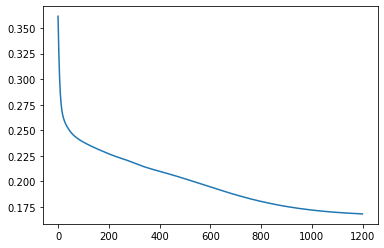

In [ ]:
plt.plot(errors)

**Data de prueba**

In [ ]:
# generando data de prueba
data_test = (np.random.rand(1000,2)*2)-1

# generando prediccion con data de prueba
Y = trainer(data_test,LR,params,training=False)

y = np.where(y >= 0.5, 1, 0)

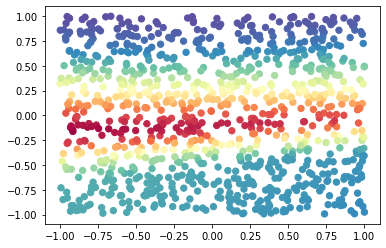

In [ ]:
# datos clasificados
plt.scatter(data_test[:,0], data_test[:,1], c=Y[:,0] ,s=40, cmap=plt.cm.Spectral);